<a href="https://colab.research.google.com/github/selina7704/DeepLearning/blob/main/05_%EC%8B%A4%EC%8A%B5_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels),(test_data, test_labels)) = imdb.load_data(num_words = 10000)
train_data.shape, test_data.shape

((25000,), (25000,))

In [ ]:
len(train_data[0])

218

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0] # 긍정 1, 부정 0 > 이진분류

1

In [ ]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i, "?") for i in train_data[0]])
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

# 데이터 준비

In [ ]:
# 피처의 단어 번호를 원핫인코딩 처리
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  print(results[0], results[0].shape)
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


[0. 1. 1. ... 0. 0. 0.] (10000,)
[0. 1. 1. ... 0. 0. 0.] (10000,)


In [ ]:
# labels
train_labels[:5]

array([1, 0, 0, 1, 0])

In [ ]:
X_train = np.asarray(x_train).astype("float32")
y_test = np.asarray(train_labels).astype("float32")

# 모델 구성

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model

<Sequential name=sequential_27, built=False>

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# 훈련

In [ ]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_test[:10000]
partial_y_train = y_test[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.6881 - loss: 0.6093 - val_accuracy: 0.8422 - val_loss: 0.4315
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.8901 - loss: 0.3623 - val_accuracy: 0.8807 - val_loss: 0.3299
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9213 - loss: 0.2600 - val_accuracy: 0.8898 - val_loss: 0.2895
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9329 - loss: 0.2085 - val_accuracy: 0.8815 - val_loss: 0.2952
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9448 - loss: 0.1730 - val_accuracy: 0.8866 - val_loss: 0.2774
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9560 - loss: 0.1465 - val_accuracy: 0.8789 - val_loss: 0.3061
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9641 - loss: 0.1232 - val_accuracy: 0.8850 - val_loss: 0.2939
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9701 - loss: 0.1086 - val_accuracy: 0.8808 -

# 훈련 검증

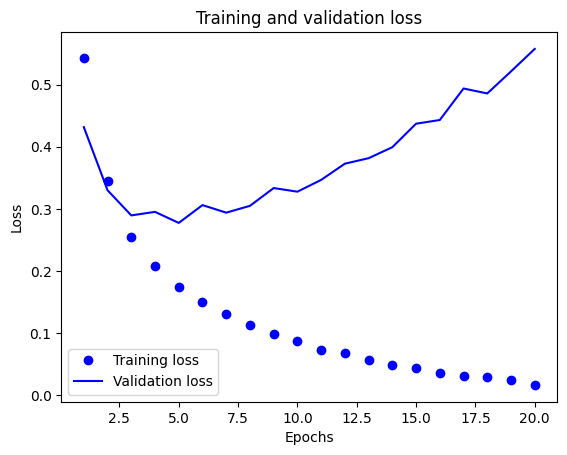

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 모델 구성 조정

In [ ]:
model1 = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model1.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

history1 = model1.fit(
    partial_x_train,
    partial_y_train,
    epochs = 4,
    batch_size = 512)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6920 - loss: 0.6138
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8862 - loss: 0.3718
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9199 - loss: 0.2674
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9292 - loss: 0.2163


In [ ]:
model1.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8805 - loss: 0.2907


[0.28990933299064636, 0.8831599950790405]

In [ ]:
model1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.29910538],
       [0.99716073],
       [0.89094794],
       ...,
       [0.11614533],
       [0.18424852],
       [0.576656  ]], dtype=float32)

# 추가실험

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dense(32, activation = "tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation = "sigmoid")
])

model2.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ["accuracy"])

history2 = model2.fit(
    partial_x_train,
    partial_y_train,
    epochs = 10,
    batch_size = 512)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6797 - loss: 0.2029
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8916 - loss: 0.0879
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9192 - loss: 0.0645
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9205 - loss: 0.0622
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9397 - loss: 0.0482
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9433 - loss: 0.0440
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9570 - loss: 0.0351
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9669 - loss: 0.0285
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9500 - loss: 0.0397
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9754 - loss: 0.0225


In [ ]:
model2.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,380 (4.90 MB)

 Trainable params: 642,689 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 642,691 (2.45 MB)

In [ ]:
model2.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8548 - loss: 0.1196


[0.11624279618263245, 0.8591600060462952]

# 새로운 데이터로 평가

In [ ]:
model2.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.03104082],
       [0.9959948 ],
       [0.98223066],
       ...,
       [0.11986879],
       [0.07812291],
       [0.9503182 ]], dtype=float32)